In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from gensim.models import KeyedVectors
import os

GDRIVE_DIR = "/content/drive/My Drive/pset_project"
goog_model = KeyedVectors.load_word2vec_format(os.path.join(GDRIVE_DIR, "GoogleNews-vectors-negative300.bin.gz"), binary=True)
print(goog_model)

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56" -O files.zip && rm -rf /tmp/cookies.txt
!unzip -o files.zip
!rm files.zip

--2022-06-20 07:58:21--  https://docs.google.com/uc?export=download&confirm=t&id=1xZaorRH-xxjfochvSesAhOTUg82_Xq56
Resolving docs.google.com (docs.google.com)... 142.251.8.138, 142.251.8.102, 142.251.8.139, ...
Connecting to docs.google.com (docs.google.com)|142.251.8.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8eienkb6k7f07oc77350ucem2acebo24/1655711850000/01333689271208460322/*/1xZaorRH-xxjfochvSesAhOTUg82_Xq56?e=download [following]
--2022-06-20 07:58:21--  https://doc-0g-54-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8eienkb6k7f07oc77350ucem2acebo24/1655711850000/01333689271208460322/*/1xZaorRH-xxjfochvSesAhOTUg82_Xq56?e=download
Resolving doc-0g-54-docs.googleusercontent.com (doc-0g-54-docs.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to doc-0g-54-docs.googleusercontent.com (doc-0g-54-doc

In [ ]:
!gdown --folder https://drive.google.com/drive/folders/1gFIrqTvvi6wsowcN3U2iZiVDvEC3fuxq
!mv -v "Structured Task (sentence decoding)"/* ./

Retrieving folder list
Processing file 11wWOcMZQfB2VAZ1VKAz9sWavnUwFeZkB EXP2.pkl
Processing file 1FTDnwEjuX3OA8P18TaiUshAo8uHgmiXU EXP3.pkl
Processing file 1spJFNztbmoaxBbExPOxQcU00RD3iMLcR neuralData_for_EXP1.csv
Processing file 1BXiBLt11U-RuboKedAtRgpnVR3D3qVnF stimuli_243sentences.txt
Processing file 1hnC7-MqCHtyC57poXPQNi5kfCITFsclD stimuli_384sentences.txt
Processing file 1xipjPAuRc7gOtwQjbIjKgdrU5TWVs1oF vectors_243sentences.GV42B300.average.txt
Processing file 1U-WxrRuyC3TsGW1vjQsmgj3jow7NMx8b vectors_384sentences.GV42B300.average.txt
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=11wWOcMZQfB2VAZ1VKAz9sWavnUwFeZkB
To: /content/Structured Task (sentence decoding)/EXP2.pkl
100% 597M/597M [00:09<00:00, 61.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1FTDnwEjuX3OA8P18TaiUshAo8uHgmiXU
To: /content/Structured Task (sentence decoding)/EXP3.pkl
100% 387M/387M [00:06<0

## Section 1

In [ ]:
import numpy as np
import pandas as pd
from learn_decoder import *

In [ ]:
#data = read_matrix("imaging_data.csv", sep=",") 
data = pd.read_csv("neuralData_for_EXP1.csv")
np_data = data.to_numpy()
data = np_data[:,1:] #(180, 185866)
data = np.delete(data, 6, 0)
# TODO remove from data
vectors = read_matrix("vectors_180concepts.GV42B300.txt", sep=" ")
vectors = np.delete(vectors, 6, 0)
#vectors = []
concepts = np.genfromtxt('stimuli_180concepts.txt', dtype=np.dtype('U')) #The names of the 180 concepts
concepts = np.delete(concepts, 6)
print(vectors.shape)

(179, 300)


In [ ]:
print(vectors.shape)
print(vectors)

(179, 300)
[[-0.41012   0.3457   -0.095168 ...  0.080747  0.16644   0.28357 ]
 [-0.27218   0.57806  -0.51773  ...  0.1707   -0.41391   0.068007]
 [-0.65578  -0.045224 -0.23556  ...  0.1091    0.319    -0.57793 ]
 ...
 [-0.25371  -0.40347   0.1994   ... -0.1978    0.030488  0.12034 ]
 [-0.72003  -0.10503  -0.30314  ... -0.1429    0.081582  0.025897]
 [-0.13142  -0.27446   0.002312 ...  0.081631 -0.28103   0.17454 ]]


In [ ]:
#oncepts = np.delete(concepts, 6)
print(type(concepts))
print(concepts)
print(len(concepts))

<class 'numpy.ndarray'>
['ability' 'accomplished' 'angry' 'apartment' 'applause' 'argument' 'art'
 'attitude' 'bag' 'ball' 'bar' 'bear' 'beat' 'bed' 'beer' 'big' 'bird'
 'blood' 'body' 'brain' 'broken' 'building' 'burn' 'business' 'camera'
 'carefully' 'challenge' 'charity' 'charming' 'clothes' 'cockroach' 'code'
 'collection' 'computer' 'construction' 'cook' 'counting' 'crazy' 'damage'
 'dance' 'dangerous' 'deceive' 'dedication' 'deliberately' 'delivery'
 'dessert' 'device' 'dig' 'dinner' 'disease' 'dissolve' 'disturb' 'do'
 'doctor' 'dog' 'dressing' 'driver' 'economy' 'election' 'electron'
 'elegance' 'emotion' 'emotionally' 'engine' 'event' 'experiment'
 'extremely' 'feeling' 'fight' 'fish' 'flow' 'food' 'garbage' 'gold'
 'great' 'gun' 'hair' 'help' 'hurting' 'ignorance' 'illness' 'impress'
 'invention' 'investigation' 'invisible' 'job' 'jungle' 'kindness' 'king'
 'lady' 'land' 'laugh' 'law' 'left' 'level' 'liar' 'light' 'magic'
 'marriage' 'material' 'mathematical' 'mechanism' 'med

In [ ]:
#uncomment to get comparison for glove vs word2vec
vectors = []
in_vocab = []
out_vocab = []
for concept in concepts:
  # get word2vec representation and save into vectors
  if concept in goog_model.vocab:
    vectors.append(goog_model[concept])
    in_vocab.append(concept)
  else:
    out_vocab.append(concept)

print(out_vocab)

vectors = np.array(vectors)
print(vectors.shape, vectors)

[]
(179, 300) [[ 0.23828125  0.125      -0.05664062 ...  0.06396484 -0.27929688
   0.02685547]
 [-0.14453125  0.2578125  -0.05517578 ... -0.00720215  0.00139618
  -0.05249023]
 [ 0.22265625  0.08789062  0.12597656 ...  0.08886719  0.0859375
   0.04248047]
 ...
 [-0.18652344  0.16796875 -0.30273438 ...  0.25        0.41210938
   0.02429199]
 [ 0.14355469 -0.00045967 -0.04760742 ... -0.21289062 -0.06591797
   0.02148438]
 [ 0.359375    0.04150391  0.09033203 ... -0.04077148 -0.08886719
  -0.01391602]]


In [ ]:
# TODO two graphs, one of average per learn, other of learners vs iteration

def comparison_plot(x, y, label_x, label_y, title):
  # Numbers of pairs of bars you want
  N = 18

  # Position of bars on x-axis
  ind = np.arange(N)

  # Figure size
  plt.figure(figsize=(10,5))

  # Width of a bar 
  width = 0.3       

  # Plotting
  plt.bar(ind, x , width, label=label_x)
  plt.bar(ind + width, y, width, label=label_y)

  plt.xlabel('Fold')
  plt.ylabel('Average Rank')
  plt.title(title)

  # xticks()
  # First argument - A list of positions at which ticks should be placed
  # Second argument -  A list of labels to place at the given locations
  x_vals = list(range(1,19))
  plt.xticks(ind + width / 2, x_vals)

  # Finding the best position for legends and putting it
  plt.legend(loc='best')
  plt.show()

In [ ]:
def cosine_similarity(x: np.ndarray, y: np.ndarray) -> float:
  norm_x = np.linalg.norm(x)
  norm_y = np.linalg.norm(y)
  xy = x.T @ y
  return xy / (norm_x * norm_y)

In [ ]:
import time

def cross_val_score(X, y, concepts, decoder_func, folds=18):
  subsetsX = np.array_split(X, folds)
  subsetsY = np.array_split(y, folds)
  test_accuracy = []
  concept_ranks = {}#concept_index: 0 for concept_index in range(10)}
  decoding_times = []
  
  for i in range(len(subsetsX)):
    # initialize test and train sets
    testX = subsetsX[i]
    testY = subsetsY[i]
    k = 0 if i != 0 else 1
    trainX = subsetsX[k]
    trainY = subsetsY[k]

    # load all train tests together
    for j in range(len(subsetsX)):
      if j != i and j != k:
        trainX = np.concatenate((trainX, subsetsX[j]))
        trainY = np.concatenate((trainY, subsetsY[j]))

    # predict & calculate closeness for every predicted concept vs all others
    # use closeness to determine rank for our concept, then calculate average_rank
    start = time.time()
    decoder = decoder_func(trainX, trainY)
    end = time.time()
    decoding_times.append(end - start)
    predict_vectors = testX @ decoder
    ranks = {}
    for concept_index in range(predict_vectors.shape[0]):
      closeness = {}
      predicted_vec = predict_vectors[concept_index]
      for k in range(y.shape[0]):
        closeness[k] = cosine_similarity(predicted_vec, y[k])
      closeness = {k: v for k, v in sorted(closeness.items(), key=lambda item: item[1], reverse=True)}
      rank = list(closeness.keys()).index(concept_index) + 1
      ranks[concept_index] = rank
      general_concept_index = i * 10 + concept_index
      concept_ranks[general_concept_index] = rank

    #for concept_index in range(predict_vectors.shape[0]):
    #  concept_ranks[concept_index] += ranks[concept_index]
 
    average_rank = sum(ranks.values()) / len(ranks.values())
    test_accuracy.append(average_rank)
    
  #for concept_index in range(predict_vectors.shape[0]):
  #  concept_ranks[concept_index] /= folds
  print(sum(decoding_times) / len(decoding_times))
  return test_accuracy, concept_ranks

In [ ]:
results, concept_ranks = cross_val_score(data, vectors, concepts, learn_decoder)
print(results)

2.13560242123074
[76.4, 107.3, 76.2, 104.5, 87.2, 98.4, 69.9, 83.5, 76.3, 89.3, 90.4, 96.4, 94.3, 96.4, 69.5, 89.5, 86.9, 92.66666666666667]


In [ ]:
word_ranks = {concepts[index]: rank for index, rank in concept_ranks.items()}
print("Concept: Rank dict:", word_ranks)

Concept: Rank dict: {'ability': 5, 'accomplished': 40, 'angry': 52, 'apartment': 58, 'applause': 178, 'argument': 22, 'art': 40, 'attitude': 40, 'bag': 47, 'ball': 89, 'bar': 20, 'bear': 138, 'beat': 148, 'bed': 123, 'beer': 171, 'big': 100, 'bird': 21, 'blood': 144, 'body': 42, 'brain': 55, 'broken': 30, 'building': 87, 'burn': 110, 'business': 150, 'camera': 178, 'carefully': 108, 'challenge': 49, 'charity': 31, 'charming': 94, 'clothes': 72, 'cockroach': 22, 'code': 69, 'collection': 144, 'computer': 58, 'construction': 179, 'cook': 121, 'counting': 28, 'crazy': 9, 'damage': 95, 'dance': 39, 'dangerous': 7, 'deceive': 81, 'dedication': 119, 'deliberately': 153, 'delivery': 167, 'dessert': 110, 'device': 23, 'dig': 129, 'dinner': 82, 'disease': 60, 'dissolve': 21, 'disturb': 44, 'do': 19, 'doctor': 155, 'dog': 173, 'dressing': 146, 'driver': 63, 'economy': 29, 'election': 83, 'electron': 42, 'elegance': 34, 'emotion': 124, 'emotionally': 74, 'engine': 133, 'event': 172, 'experiment':

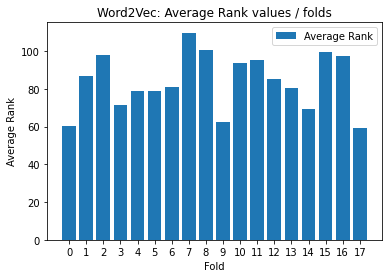

In [ ]:
import matplotlib.pyplot as plt

x_vals = list(range(18))
plt.xticks(x_vals)
plt.bar(x_vals, results, label='Average Rank')
plt.title('Word2Vec: Average Rank values / folds')
plt.ylabel('Average Rank')
plt.xlabel('Fold')
plt.legend()
plt.show()

In [ ]:
vectors = read_matrix("vectors_180concepts.GV42B300.txt", sep=" ")
vectors = np.delete(vectors, 6, 0)
results_glove, concept_ranks_glove = cross_val_score(data, vectors, concepts, learn_decoder)

1.925269431538052


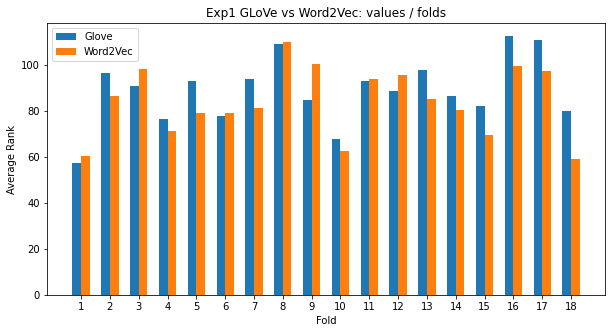

In [ ]:
comparison_plot(results_glove, results, "Glove", "Word2Vec", "Exp1 GLoVe vs Word2Vec: values / folds")

In [ ]:
successful_concepts = [concepts[index] for index, rank in concept_ranks.items() if rank <= 10]
failed_concepts = [concepts[index] for index, rank in concept_ranks.items() if rank >= 170]

print(successful_concepts)
print(failed_concepts)

['charity', 'elegance', 'mathematical', 'read', 'spoke', 'willingly']
['beer', 'camera', 'construction', 'delivery', 'dog', 'event', 'level', 'mountain', 'seafood', 'skin', 'tree', 'weak']


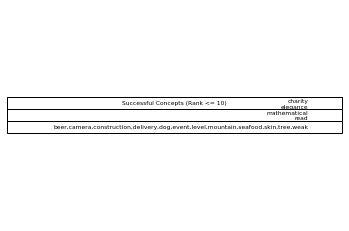

In [ ]:
import matplotlib.pyplot as plt

fig, ax =plt.subplots(1,1)
data=[["\n".join(successful_concepts)], [",".join(failed_concepts)]]
column_labels=["Successful Concepts (Rank <= 10)", "Failed Concepts (Rank >= 170)"]
ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,colLabels=column_labels,loc="center")

plt.show()


## Section 3

In [ ]:
import pickle

exp2_file = open ("EXP2.pkl", "rb")
exp2_contents = pickle.load(exp2_file)
exp2_file.close()

exp3_file = open ("EXP3.pkl", "rb")
exp3_contents = pickle.load(exp3_file)
exp3_file.close()

In [ ]:
print(exp2_contents.keys())
print(exp3_contents.keys())

dict_keys(['__header__', '__version__', '__globals__', 'keyPassageCategory', 'keyPassages', 'keySentences', 'labelsPassageCategory', 'labelsPassageForEachSentence', 'labelsSentences', 'meta', 'Fmridata'])
dict_keys(['__header__', '__version__', '__globals__', 'keyPassageCategory', 'keyPassages', 'keySentences', 'labelsPassageCategory', 'labelsPassageForEachSentence', 'labelsSentences', 'meta', 'Fmridata'])


In [ ]:
print(exp2_contents["Fmridata"].shape)
print(exp3_contents["Fmridata"].shape)

(384, 185866)
(243, 185866)


In [ ]:
import numpy as np
from learn_decoder import *

exp2_data = exp2_contents["Fmridata"]
exp2_vectors = read_matrix("vectors_384sentences.GV42B300.average.txt", sep=" ")
exp2_sentencesfile = open("stimuli_384sentences.txt", "r")
exp2_sentences = np.asarray(exp2_sentencesfile.readlines())
exp2_sentencesfile.close()
print(exp2_vectors.shape)
print(exp2_sentences.shape)

exp3_data = exp3_contents["Fmridata"]
exp3_vectors = read_matrix("vectors_243sentences.GV42B300.average.txt", sep=" ")
exp3_sentencesfile = open("stimuli_243sentences.txt", "r")
exp3_sentences = np.asarray(exp3_sentencesfile.readlines())
exp3_sentencesfile.close()
print(exp3_vectors.shape)
print(len(exp3_sentences))

(384, 300)
(384,)
(243, 300)
243


In [ ]:
results_exp2, sentence_ranks2 = cross_val_score(exp2_data, exp2_vectors, exp2_sentences, learn_decoder)

2.9024165868759155


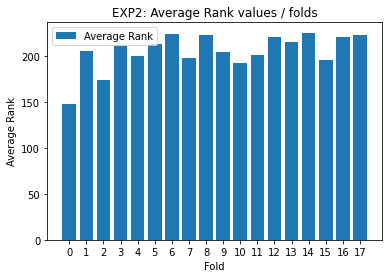

In [ ]:
import matplotlib.pyplot as plt

x_vals = list(range(18))
plt.xticks(x_vals)
plt.bar(x_vals, results_exp2, label='Average Rank')
plt.title('EXP2: Average Rank values / folds')
plt.ylabel('Average Rank')
plt.xlabel('Fold')
plt.legend()
plt.show()

In [ ]:
word_ranks2 = {exp2_sentences[index]: rank for index, rank in sentence_ranks2.items()}
print("Concept: Rank dict:", word_ranks2)

Concept: Rank dict: {'An accordion is a portable musical instrument with two keyboards.\n': 354, 'One keyboard is used for individual notes, the other for chords.\n': 129, 'Accordions produce sound with bellows that blow air through reeds.\n': 185, 'An accordionist plays both keyboards while opening and closing the bellows.\n': 343, 'An apartment is a self-contained home that is part of a building.\n': 196, 'An apartment may have one or more rooms, as well as a kitchen and a bathroom.\n': 111, 'Some apartments are for single people, others for families.\n': 63, 'The building can have a garage, a laundry facility or extra storage space.\n': 95, 'An apple is a fruit that can be green, red or yellow.\n': 5, 'Apples have thin skin, a crisp, sweet pulp and seeds inside.\n': 6, 'Some very tart apples are used to make cider.\n': 368, 'Apples can be eaten raw, roasted or baked in pies.\n': 137, 'Arson is the criminal act of burning a building or wildland.\n': 217, 'A fire investigation determi

In [ ]:
results_exp3, sentence_ranks3 = cross_val_score(exp3_data, exp3_vectors, exp3_sentences, learn_decoder)

1.8088864220513239


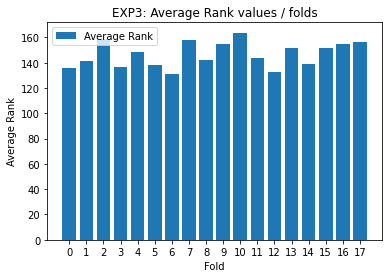

In [ ]:
import matplotlib.pyplot as plt


x_vals = list(range(18))
plt.xticks(x_vals)
plt.bar(x_vals, results_exp3, label='Average Rank')
plt.title('EXP3: Average Rank values / folds')
plt.ylabel('Average Rank')
plt.xlabel('Fold')
plt.legend()
plt.show()

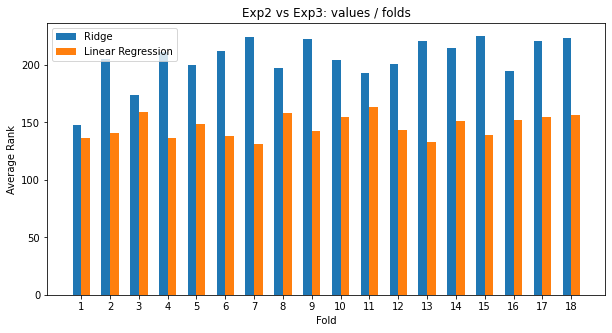

In [ ]:
comparison_plot(results_exp2, results_exp3, "Exp2", "Exp3", "Exp2 vs Exp3: values / folds")

In [ ]:
word_ranks3 = {exp3_sentences[index]: rank for index, rank in sentence_ranks3.items()}
print("Concept: Rank dict:", word_ranks3)

Concept: Rank dict: {'Beekeeping encourages the conservation of local habitats.\n': 241, "It is in every beekeeper's interest to conserve local plants that produce pollen.\n": 209, 'As a passive form of agriculture, it does not require that native vegetation be cleared to make way for crops.\n': 49, 'Beekeepers also discourage the use of pesticides on crops, because they could kill the honeybees.\n': 240, 'Artisanal beekeepers go to extremes for their craft, but their product is worth the effort.\n': 108, 'Artisanal honey-making emphasizes quality and character over quantity and consistency.\n': 206, 'To produce the finest honey, beekeepers become micromanagers of their honeybees.\n': 232, 'They scout the fields, know when nectar flows, and select the best ways to extract honey.\n': 40, 'As the beekeeper opens the hive, the deep hum of 40,000 bees fills the air.\n': 218, 'The beekeeper checks honey stores, pollen supplies, and the bee nursery.\n': 233, "Bees crawl across his bare arms 

## Section 4

In [ ]:
categories2 = []

for category_array in exp2_contents["keyPassageCategory"][0]:
  category = category_array[0]
  categories2.append(category)

print(categories2)

['animal', 'appliance', 'bird', 'body_part', 'building_part', 'clothing', 'crime', 'disaster', 'drink_non_alcoholic', 'dwelling', 'fish', 'fruit', 'furniture', 'human', 'insect', 'kitchen_utensil', 'landscape', 'music', 'place', 'profession', 'tool', 'vegetable', 'vehicles_transport', 'weapon']


In [ ]:
passages2 = []

for passage_list in exp2_contents["keyPassages"]:
  passage_array = passage_list[0]
  passage = passage_array[0]
  passages2.append(passage)

print(passages2)

['Accordion', 'Apartment', 'Apple', 'Arson', 'Automobile', 'Axe', 'Banana', 'Bed', 'Bee', 'Bicycle', 'Blacksmith', 'Blender', 'Boy', 'Broccoli', 'Butterfly', 'Carpenter', 'Cat', 'Chair', 'Clarinet', 'Cod', 'Coffee', 'Desert', 'Desk', 'Door', 'Dress', 'Driving_under_the_influence', 'Drought', 'Eagle', 'Earthquake', 'Elephant', 'Eye', 'Farm', 'Finger', 'Flood', 'Floor', 'Foot', 'Forest', 'Fork', 'Frying_pan', 'Girl', 'Glove', 'Hammer', 'Hand_grenade', 'Horse', 'Hospital', 'House', 'Igloo', 'Knife', 'Lentil', 'Lettuce', 'Library', 'Log_cabin', 'Man', 'Milk', 'Mosquito', 'Mountain', 'Mouth', 'Mug', 'Murder', 'Orange_juice', 'Parrot', 'Peach', 'Piano', 'Piranha', 'Raspberry', 'Raven', 'Refrigerator', 'Rifle', 'Salmon', 'Saw', 'Scientist', 'Scissors', 'Screwdriver', 'Shark', 'Ship', 'Shoe', 'Soldier', 'Spear', 'Spider', 'Swamp', 'Sweater', 'Table_(furniture)', 'Television', 'Theft', 'Toaster', 'Tomato', 'Train', 'Train_station', 'Tropical_cyclone', 'Violin', 'Vulture', 'Wall', 'Water', 'Whal

In [ ]:
from collections import defaultdict

topic_passages2 = defaultdict(list)

for i, id_list in enumerate(exp2_contents["labelsPassageCategory"]):
  id = id_list[0]
  topic = categories2[id - 1]
  passage = passages2[i]
  topic_passages2[topic].append(passage)

print(topic_passages2)

defaultdict(<class 'list'>, {'music': ['Accordion', 'Clarinet', 'Piano', 'Violin'], 'dwelling': ['Apartment', 'House', 'Igloo', 'Log_cabin'], 'fruit': ['Apple', 'Banana', 'Peach', 'Raspberry'], 'crime': ['Arson', 'Driving_under_the_influence', 'Murder', 'Theft'], 'vehicles_transport': ['Automobile', 'Bicycle', 'Ship', 'Train'], 'weapon': ['Axe', 'Hand_grenade', 'Rifle', 'Spear'], 'furniture': ['Bed', 'Chair', 'Desk', 'Table_(furniture)'], 'insect': ['Bee', 'Butterfly', 'Mosquito', 'Spider'], 'profession': ['Blacksmith', 'Carpenter', 'Scientist', 'Soldier'], 'appliance': ['Blender', 'Refrigerator', 'Television', 'Toaster'], 'human': ['Boy', 'Girl', 'Man', 'Woman'], 'vegetable': ['Broccoli', 'Lentil', 'Lettuce', 'Tomato'], 'animal': ['Cat', 'Elephant', 'Horse', 'Whale'], 'fish': ['Cod', 'Piranha', 'Salmon', 'Shark'], 'drink_non_alcoholic': ['Coffee', 'Milk', 'Orange_juice', 'Water'], 'landscape': ['Desert', 'Forest', 'Mountain', 'Swamp'], 'building_part': ['Door', 'Floor', 'Wall', 'Windo

In [ ]:
sentence_topics2 = {}

for i, sentence in enumerate(exp2_sentences):
  passage_id = exp2_contents["labelsPassageForEachSentence"][i][0]
  passage = passages2[passage_id - 1]
  returned_topic = None

  for topic, p in topic_passages2.items():
      if passage in p:
        returned_topic = topic

  sentence_topics2[sentence] = returned_topic

print(sentence_topics2)

{'An accordion is a portable musical instrument with two keyboards.\n': 'music', 'One keyboard is used for individual notes, the other for chords.\n': 'music', 'Accordions produce sound with bellows that blow air through reeds.\n': 'music', 'An accordionist plays both keyboards while opening and closing the bellows.\n': 'music', 'An apartment is a self-contained home that is part of a building.\n': 'dwelling', 'An apartment may have one or more rooms, as well as a kitchen and a bathroom.\n': 'dwelling', 'Some apartments are for single people, others for families.\n': 'dwelling', 'The building can have a garage, a laundry facility or extra storage space.\n': 'dwelling', 'An apple is a fruit that can be green, red or yellow.\n': 'fruit', 'Apples have thin skin, a crisp, sweet pulp and seeds inside.\n': 'fruit', 'Some very tart apples are used to make cider.\n': 'fruit', 'Apples can be eaten raw, roasted or baked in pies.\n': 'fruit', 'Arson is the criminal act of burning a building or wi

In [ ]:
topic_ranks2 = defaultdict(list)

for sentence, rank in word_ranks2.items():
  topic = sentence_topics2[sentence]
  topic_ranks2[topic].append(rank)

print(topic_ranks2)

topic_avgrank2 = {topic: sum(topic_ranks2[topic]) / len(topic_ranks2[topic]) for topic in topic_ranks2.keys()}

print(topic_avgrank2)

topic_avgrank2_list = [(key, val) for key, val in topic_avgrank2.items()]
topic_avgrank2_list = sorted(topic_avgrank2_list, key=lambda x: x[1])
print(topic_avgrank2_list)

defaultdict(<class 'list'>, {'music': [354, 129, 185, 343, 322, 369, 260, 179], 'dwelling': [196, 111, 63, 95, 268, 304, 317, 325, 140, 340, 360, 327], 'fruit': [5, 6, 368, 137, 270, 239, 100, 235], 'crime': [217, 361, 227, 258, 378, 220, 184, 374], 'vehicles_transport': [121, 15, 50, 188, 197, 129, 125, 202], 'weapon': [339, 142, 127, 355, 138, 220, 379, 123], 'furniture': [13, 49, 379, 282, 153, 288, 356, 180, 95, 227, 378, 267], 'insect': [272, 330, 193, 51, 144, 83, 132, 162], 'profession': [364, 231, 245, 351, 330, 100, 245, 367], 'appliance': [230, 176, 156, 113], 'human': [126, 193, 379, 139, 147, 42, 122, 277], 'vegetable': [180, 349, 322, 215], 'animal': [216, 165, 63, 23, 86, 59, 63, 94, 189, 334, 230, 92], 'fish': [32, 140, 108, 121], 'drink_non_alcoholic': [358, 145, 250, 354], 'landscape': [230, 146, 78, 97, 249, 178, 48, 71], 'building_part': [279, 367, 320, 168, 278, 111, 26, 246], 'clothing': [30, 102, 38, 78, 360, 212, 284, 368], 'disaster': [187, 69, 125, 82, 278, 368

### Exp3

In [ ]:
categories3 = []

for category_array in exp3_contents["keyPassageCategory"][0]:
  category = category_array[0]
  categories3.append(category)

print(categories3)

['astronaut', 'beekeeping', 'blindness', 'bone_fracture', 'castle', 'computer_graphics', 'dreams', 'gambling', 'hurricane', 'ice_cream', 'infection', 'law_school', 'lawn_mower', 'opera', 'owl', 'painter', 'pharmacist', 'polar_bear', 'pyramid', 'rock_climbing', 'skiing', 'stress', 'taste', 'tuxedo']


In [ ]:
passages3 = []

for passage_list in exp3_contents["keyPassages"]:
  passage_array = passage_list[0]
  passage = passage_array[0]
  passages3.append(passage)

print(passages3)

['beekeeping', 'beekeeping', 'beekeeping', 'dreams', 'dreams', 'dreams', 'gambling', 'gambling', 'gambling', 'hurricane', 'hurricane', 'hurricane', 'ice_cream', 'ice_cream', 'ice_cream', 'lawn_mower', 'lawn_mower', 'lawn_mower', 'astronaut', 'astronaut', 'astronaut', 'computer_graphics', 'computer_graphics', 'computer_graphics', 'law_school', 'law_school', 'law_school', 'pharmacist', 'pharmacist', 'pharmacist', 'stress', 'stress', 'stress', 'tuxedo', 'tuxedo', 'tuxedo', 'blindness', 'blindness', 'blindness', 'taste', 'taste', 'taste', 'bone_fracture', 'bone_fracture', 'bone_fracture', 'infection', 'infection', 'infection', 'opera', 'opera', 'opera', 'painter', 'painter', 'painter', 'owl', 'owl', 'owl', 'polar_bear', 'polar_bear', 'polar_bear', 'castle', 'castle', 'castle', 'pyramid', 'pyramid', 'pyramid', 'rock_climbing', 'rock_climbing', 'rock_climbing', 'skiing', 'skiing', 'skiing']


In [ ]:
from collections import defaultdict

topic_passages3 = defaultdict(list)

for i, id_list in enumerate(exp3_contents["labelsPassageCategory"]):
  id = id_list[0]
  topic = categories3[id - 1]
  passage = passages3[i]
  topic_passages3[topic].append(passage)

print(topic_passages3)

defaultdict(<class 'list'>, {'beekeeping': ['beekeeping', 'beekeeping', 'beekeeping'], 'dreams': ['dreams', 'dreams', 'dreams'], 'gambling': ['gambling', 'gambling', 'gambling'], 'hurricane': ['hurricane', 'hurricane', 'hurricane'], 'ice_cream': ['ice_cream', 'ice_cream', 'ice_cream'], 'lawn_mower': ['lawn_mower', 'lawn_mower', 'lawn_mower'], 'astronaut': ['astronaut', 'astronaut', 'astronaut'], 'computer_graphics': ['computer_graphics', 'computer_graphics', 'computer_graphics'], 'law_school': ['law_school', 'law_school', 'law_school'], 'pharmacist': ['pharmacist', 'pharmacist', 'pharmacist'], 'stress': ['stress', 'stress', 'stress'], 'tuxedo': ['tuxedo', 'tuxedo', 'tuxedo'], 'blindness': ['blindness', 'blindness', 'blindness'], 'taste': ['taste', 'taste', 'taste'], 'bone_fracture': ['bone_fracture', 'bone_fracture', 'bone_fracture'], 'infection': ['infection', 'infection', 'infection'], 'opera': ['opera', 'opera', 'opera'], 'painter': ['painter', 'painter', 'painter'], 'owl': ['owl', 

In [ ]:
sentence_topics3 = {}

for i, sentence in enumerate(exp3_sentences):
  passage_id = exp3_contents["labelsPassageForEachSentence"][i][0]
  passage = passages3[passage_id - 1]
  returned_topic = None

  for topic, p in topic_passages3.items():
      if passage in p:
        returned_topic = topic

  sentence_topics3[sentence] = returned_topic

print(sentence_topics3)

{'Beekeeping encourages the conservation of local habitats.\n': 'beekeeping', "It is in every beekeeper's interest to conserve local plants that produce pollen.\n": 'beekeeping', 'As a passive form of agriculture, it does not require that native vegetation be cleared to make way for crops.\n': 'beekeeping', 'Beekeepers also discourage the use of pesticides on crops, because they could kill the honeybees.\n': 'beekeeping', 'Artisanal beekeepers go to extremes for their craft, but their product is worth the effort.\n': 'beekeeping', 'Artisanal honey-making emphasizes quality and character over quantity and consistency.\n': 'beekeeping', 'To produce the finest honey, beekeepers become micromanagers of their honeybees.\n': 'beekeeping', 'They scout the fields, know when nectar flows, and select the best ways to extract honey.\n': 'beekeeping', 'As the beekeeper opens the hive, the deep hum of 40,000 bees fills the air.\n': 'beekeeping', 'The beekeeper checks honey stores, pollen supplies, 

In [ ]:
topic_ranks3 = defaultdict(list)

for sentence, rank in word_ranks3.items():
  topic = sentence_topics3[sentence]
  topic_ranks3[topic].append(rank)

print(topic_ranks3)

topic_avgrank3 = {topic: sum(topic_ranks3[topic]) / len(topic_ranks3[topic]) for topic in topic_ranks3.keys()}

print(topic_avgrank3)

topic_avgrank3_list = [(key, val) for key, val in topic_avgrank3.items()]
topic_avgrank3_list = sorted(topic_avgrank3_list, key=lambda x: x[1])
print(topic_avgrank3_list)

defaultdict(<class 'list'>, {'beekeeping': [241, 209, 49, 240, 108, 206, 232, 40, 218, 233, 240], 'dreams': [190, 54, 242, 59, 193, 218, 110, 222, 225, 231], 'gambling': [194, 59, 240, 141, 226, 236, 76, 199, 231, 240], 'hurricane': [89, 32, 232, 57, 208, 205, 19, 232, 237, 242], 'ice_cream': [166, 79, 240, 124, 184, 218, 34, 227, 237, 236], 'lawn_mower': [111, 57, 237, 109, 192, 213, 44, 228, 232, 222], 'astronaut': [187, 59, 225, 79, 191, 224, 20, 233, 176, 242], 'computer_graphics': [195, 102, 240, 125, 214, 238, 70, 230, 233, 243], 'law_school': [168, 99, 231, 98, 181, 230, 30, 235, 233, 237], 'pharmacist': [187, 126, 235, 92, 234, 234, 32, 228, 227, 243], 'stress': [206, 4, 222, 113, 224, 223, 65, 232, 204, 242], 'tuxedo': [175, 93, 215, 65, 190, 211, 38, 209, 166, 238], 'blindness': [105, 3, 102, 33, 211, 231, 79, 233, 230, 211], 'taste': [213, 59, 242, 64, 213, 233, 57, 233, 228], 'bone_fracture': [242, 197, 23, 227, 80, 216, 214, 72, 231, 227, 233], 'infection': [225, 68, 239, 

# Semi Structured

## Exp2 Embeddings vs Bert

In [ ]:
!pip install sentence_transformers 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 3.4 MB/s 
     |████████████████████████████████| 4.4 MB 9.0 MB/s 
     |████████████████████████████████| 1.2 MB 42.3 MB/s 
     |████████████████████████████████| 86 kB 5.4 MB/s 
     |████████████████████████████████| 6.6 MB 41.9 MB/s 
     |████████████████████████████████| 596 kB 41.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=7a573cfc49b8162bf371352e5f8a770b97057bc6670006ce59e4ed318e1ffd85
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-distilroberta-v1')

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.86k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/653 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/329M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

In [ ]:
semi_data = exp2_contents["Fmridata"]
#semi_vectors = read_matrix("vectors_384sentences.GV42B300.average.txt", sep=" ")
semi_vectors = []
semi_sentencesfile = open("stimuli_384sentences.txt", "r")
semi_sentences = np.asarray(semi_sentencesfile.readlines())
semi_sentencesfile.close()
print(semi_sentences.shape)

(384,)


In [ ]:
semi_vectors = model.encode(semi_sentences)

In [ ]:
results_semi, sentence_semi = cross_val_score(semi_data, semi_vectors, semi_sentences, learn_decoder)

KeyboardInterrupt: ignored

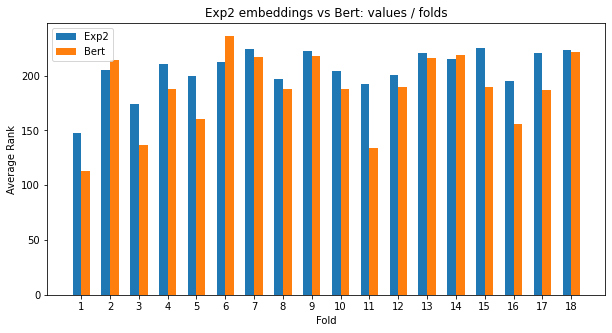

In [ ]:
# Numbers of pairs of bars you want
N = 18

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, results_exp2 , width, label='Exp2')
plt.bar(ind + width, results_semi, width, label='Bert')

plt.xlabel('Fold')
plt.ylabel('Average Rank')
plt.title('Exp2 embeddings vs Bert: values / folds')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
x_vals = list(range(1,19))
plt.xticks(ind + width / 2, x_vals)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

## Brain Encoder

In [ ]:
exp2_data[0].shape

(185866,)

In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
from tqdm.notebook import tqdm


def brain_encode(vectors):
  r2_list = []
  pvalue_list = []

  for i, voxel in tqdm(enumerate(exp2_data.T)):
    if i % 8 == 0:
      model = LinearRegression()
      reg = model.fit(vectors, voxel)

      X2 = sm.add_constant(exp2_vectors)
      est = sm.OLS(voxel, X2)
      est2 = est.fit()

      pvalue = est2.summary2().tables[0][3][5]
      r2 = est2.summary2().tables[0][1][6]

      r2_list.append(r2)
      pvalue_list.append(pvalue)
  
  return r2_list, pvalue_list

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
r2_list_exp2, pvalue_list_exp2 = brain_encode(exp2_vectors)
r2_list_semi, pvalue_list_semi = brain_encode(semi_vectors)

0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:46: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1708: RuntimeWarning: invalid value encountered in double_scalars
  return self.mse_model/self.mse_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.p

0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:46: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:867: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1708: RuntimeWarning: invalid value encountered in double_scalars
  return self.mse_model/self.mse_resid
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.p

In [ ]:
import json

data_dict = {"r2_exp2": r2_list_exp2,
             "r2_semi": r2_list_semi,
             "pvalue_exp2": pvalue_list_exp2,
             "pvalue_semi": pvalue_list_semi}

with open("data.json", "w") as fp:
  json.dump(data_dict, fp)

In [ ]:
comparison_plot(r2_list_exp2, r2_list_semi, "Exp2 R2", "Bert R2", title)

In [ ]:
import json

with open("data.json") as fp:
  data_dict = json.load(fp)
data_dict.keys()

dict_keys(['r2_exp2', 'r2_semi', 'pvalue_exp2', 'pvalue_semi'])

In [ ]:
print(len(data_dict["r2_exp2"]))
print(type(data_dict["r2_exp2"]))

23234
<class 'list'>


In [ ]:
fixed_r2_exp2 = [float(item) for item in data_dict["r2_exp2"] if not np.isnan(float(item))]
fixed_r2_semi = [float(item) for item in data_dict["r2_semi"] if not np.isnan(float(item))]
fixed_pvalue_exp2 = [float(item) for item in data_dict["pvalue_exp2"] if not np.isnan(float(item))]
fixed_pvalue_semi = [float(item) for item in data_dict["pvalue_semi"] if not np.isnan(float(item))]

In [ ]:
len(fixed_r2_exp2)

23218

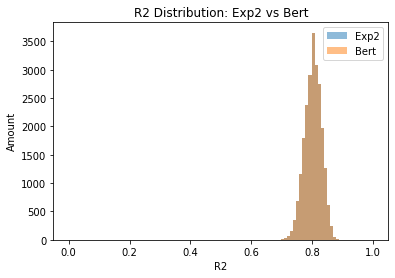

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(0, 1, 100)
plt.title("R2 Distribution: Exp2 vs Bert")
plt.ylabel("Amount")
plt.xlabel("R2")
plt.hist(fixed_r2_exp2, bins, alpha=0.5, label='Exp2')
plt.hist(fixed_r2_semi, bins, alpha=0.5, label='Bert')
plt.legend(loc='upper right')
plt.show()

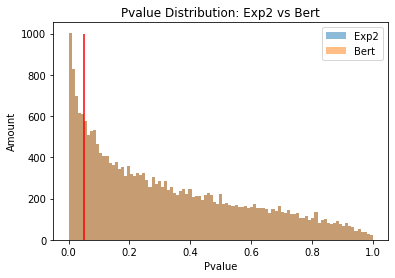

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bins = np.linspace(0, 1, 100)
plt.title("Pvalue Distribution: Exp2 vs Bert")
plt.ylabel("Amount")
plt.xlabel("Pvalue")
plt.hist(fixed_pvalue_exp2, bins, alpha=0.5, label='Exp2')
plt.hist(fixed_pvalue_semi, bins, alpha=0.5, label='Bert')
plt.vlines(0.05, 0, 1000, color='red')
plt.legend(loc='upper right')
plt.show()

In [ ]:
significant_exp2 = [item <= 0.05 for item in fixed_pvalue_exp2]
significant_semi = [item <= 0.05 for item in fixed_pvalue_semi]
proportion_exp2 = sum(significant_exp2) / len(significant_exp2)
proportion_semi = sum(significant_semi) / len(significant_semi)

pvalue_avg_exp2 = sum(fixed_pvalue_exp2) / len(fixed_pvalue_exp2)
pvalue_avg_semi = sum(fixed_pvalue_semi) / len(fixed_pvalue_semi)

r2_avg_exp2 = sum(fixed_r2_exp2) / len(fixed_r2_exp2)
r2_avg_semi = sum(fixed_r2_semi) / len(fixed_r2_semi)

In [ ]:
print(any([np.isnan(item) for item in fixed_r2_exp2]))

False


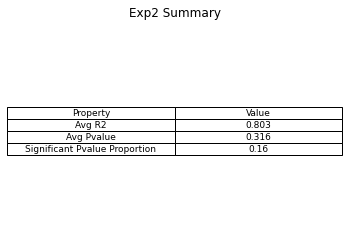

In [ ]:
fig, ax =plt.subplots(1,1)
data=[["Avg R2", round(r2_avg_exp2, 3)],
      ["Avg Pvalue", round(pvalue_avg_exp2, 3)],
      ["Significant Pvalue Proportion", round(proportion_exp2, 3)]]
column_labels=["Property", "Value"]
ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,colLabels=column_labels,loc="center", cellLoc='center')
ax.set_title("Exp2 Summary")

plt.show()

In [ ]:
fig, ax =plt.subplots(1,1)
data=[["Avg R2", round(r2_avg_semi, 3)],
      ["Avg Pvalue", round(pvalue_avg_semi, 3)],
      ["Significant Pvalue Proportion", round(proportion_semi, 3)]]
column_labels=["Property", "Value"]
ax.axis('tight')
ax.axis('off')
ax.table(cellText=data,colLabels=column_labels,loc="center", cellLoc='center')
ax.set_title("Bert Summary")

plt.show()

## Open Ended Task

In [ ]:
# We want to compare analysis 1 to different regularization

import sklearn.linear_model

"""def learn_decoder_lasso(data, vectors):
     lasso = sklearn.linear_model.MultiTaskLassoCV(
         alphas=[1, 10, .01, 100, .001, 1000, .0001, 10000, .00001, 100000, .000001, 1000000],
         fit_intercept=False, n_jobs=-1
     )
     lasso.fit(data, vectors)
     return lasso.coef_.T"""

def learn_decoder_lr(data, vectors):
    lr = sklearn.linear_model.LinearRegression(
          fit_intercept=False
    )
    lr.fit(data, vectors)
    return lr.coef_.T

In [ ]:
results_exp1_lr, concept_ranks_exp1_lr = cross_val_score(data, vectors, concepts, learn_decoder_lr)

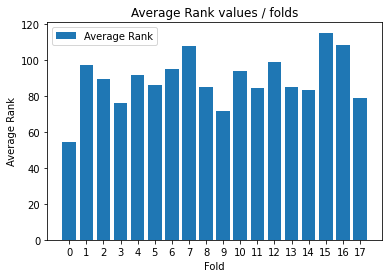

In [ ]:
import matplotlib.pyplot as plt

x_vals = list(range(18))
plt.xticks(x_vals)
plt.bar(x_vals, results_exp1_lr, label='Average Rank')
plt.title('Average Rank values / folds')
plt.ylabel('Average Rank')
plt.xlabel('Fold')
plt.legend()
plt.show()

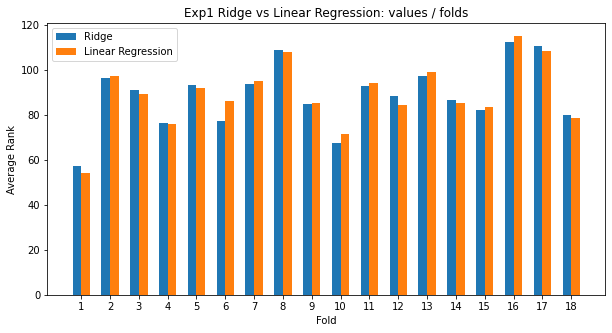

In [ ]:
comparison_plot(results, results_exp1_lr, "Ridge", "Linear Regression", "Exp1 Ridge vs Linear Regression: values / folds")

In [ ]:
results_exp2_lr, sentence_ranks2_lr = cross_val_score(exp2_data, exp2_vectors, exp2_sentences, learn_decoder_lr)

27.15997016429901


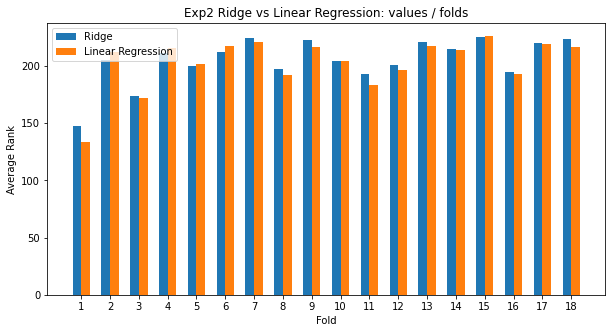

In [ ]:
comparison_plot(results_exp2, results_exp2_lr, "Ridge", "Linear Regression", "Exp2 Ridge vs Linear Regression: values / folds")

In [ ]:
results_exp3_lr, sentence_ranks3_lr = cross_val_score(exp3_data, exp3_vectors, exp3_sentences, learn_decoder_lr)

16.392398569318985


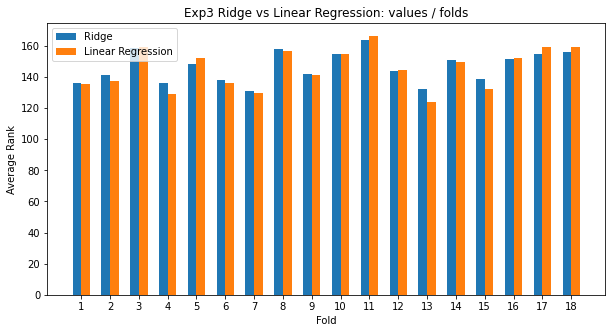

In [ ]:
comparison_plot(results_exp3, results_exp3_lr, "Ridge", "Linear Regression", "Exp3 Ridge vs Linear Regression: values / folds")

In [ ]:
results_semi_lr, sentence_semi_lr = cross_val_score(semi_data, semi_vectors, semi_sentences, learn_decoder_lr)

59.68961505095164


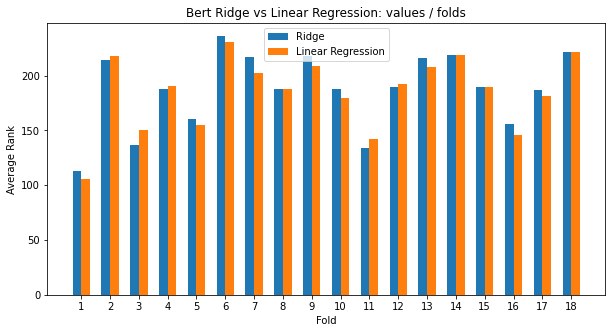

In [ ]:
comparison_plot(results_semi, results_semi_lr, "Ridge", "Linear Regression", "Bert Ridge vs Linear Regression: values / folds")

In [ ]:
def topic_barplot(x, y, x_title, y_title, title):
  y_pos = np.arange(len(y))

  # Create bars
  plt.bar(y_pos, y)

  # Create names on the x-axis
  plt.xticks(y_pos, x, rotation="vertical")

  # Show graphic
  plt.xlabel(x_title)
  plt.ylabel(y_title)
  plt.title(title)
  plt.show()

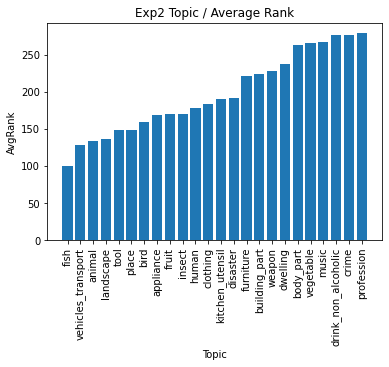

In [ ]:
topic2_disp = [item[0] for item in topic_avgrank2_list]
avgrank2_disp = [item[1] for item in topic_avgrank2_list]
topic_barplot(topic2_disp, avgrank2_disp, "Topic", "AvgRank", "Exp2 Topic / Average Rank")

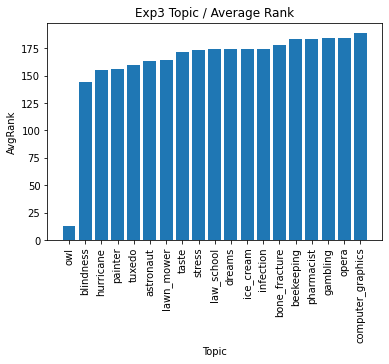

In [ ]:
topic3_disp = [item[0] for item in topic_avgrank3_list]
avgrank3_disp = [item[1] for item in topic_avgrank3_list]
topic_barplot(topic3_disp, avgrank3_disp, "Topic", "AvgRank", "Exp3 Topic / Average Rank")